In [1]:
from __future__ import division
from IO import *
from cycler import cycler
import matplotlib as mpl
%matplotlib inline
from numba import autojit

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
# Instantiate classes
cortex = Cortex()
trn = TRN()
gr = GRAPH(cortex)

# styling
gammaColor = '#00cc99'

def xax(gamma, duration):
    x= np.arange(0,(duration-1)/1000,(duration)/1000/len(gamma) )
    return x

@autojit
def resonanceFS(F, tauv=15):
    T = 2000
    dt = 1
    t = np.arange(0, T, dt)
    F = np.logspace(0.5, 2.3, 200)

    res_var = np.empty(len(F), dtype=np.float64)
    b = 2
    for k, f in enumerate(F):
        A = 0.01
        I = A * np.cos(2 * np.pi * f * t / 1000)
        res_v = []
        res_u = []
        u = 0
        t_rest = 0

        # izh neuron model for cortical fast spiking neurons (that burst)
        v = -60
        for i in range(len(t)):
            v += dt / tauv * ((v + 60) * (v + 50) - 20 * u + 8 * I[i])
            u += dt * 0.044 * ((v + 55) - u)
            if v > 25:
                v = -40
                u += 50
            if i * dt > 1500:
                res_v.append(v / A)

        var = np.var(res_v)
        #         var = np.max(res_v)-np.min(res_v)
        res_var[k] = var
    return res_var



In [4]:
# #-------------------------------
# # PARAMS SEARCH
# #-------------------------------
c = cortex
c.N = 100
c.g = 10
c.d1 = 10
c.d2 = 60000
c.d3 = 10
c.initTime()
c.sigma = 60
c.WII = 1400 #2800
c.S = 100
c.model = "gp-izh-subnetworks"
c.glob = 0

# shared weights
c.sG = 10
c.sWII = 10

c.FACT = 1
c.r=0

c.ratio = 15
c.LTD  = 1e-0*4.7e-6 * c.FACT * c.N
c.LTP = c.ratio * c.LTD

c.tauv=15

c.with_currents = True

# for S in np.arange(50,400,50):
#     Parallel(n_jobs=8)(delayed(cortex.runSimulation)(N,0, G, S, d1, d2, d3, before, after, sigma, \
# WII, LTP, LTD) for G in np.linspace(1,9,"8))

sWIIList = [0,10]
sGList = [0,1,5,10,15,20,25]
sGList = np.arange(0,25,2)
LTDList = [1e-0*4.7e-6 * c.FACT * c.N]
taulist = np.arange(15,95,2)

# cortex.runSimulation()

# c.readSimulation()
# gr.plotWeights(tauv = c.tauv)


# for c.d2 in [60000]:
#     for c.sWII in sWIIList:
#         for c.sG in sGList:
#             for c.LTD in LTDList:
#                 c.LTP = c.ratio * c.LTD
#                 Parallel(n_jobs=8)(delayed(c.runSimulation)(i=0, tauv=c.tauv) for c.tauv in taulist)

# df = pd.DataFrame(columns = ['tauv', 'd2','sWII', 'sG', 'LTD',
#                              'maxBegin', 'argmaxBegin', 'maxEnd', 'argmaxEnd',
#                             'f1Begin', 'p1Begin', 'f2Begin', 'p2Begin', 
#                              'f1End', 'p1End', 'f2End', 'p2End', 
#                              'fBothStart', 'pBothStart', 'fBothEnd', 'pBothEnd', 'key'])
# i=0
# for c.tauv in taulist:
#     for c.d2 in [60000]:
#         for c.sWII in sWIIList:
#             for c.sG in sGList:
#                 for c.LTD in LTDList:
#                     c.LTP = c.ratio * c.LTD
#                     print(c.tauv, c.sWII, c.sG)
#                     c.readSimulation()
#                     csd = gr.valCSD()
#                     if c.tauv <=35 and c.sG<=10:
#                         key=-2
#                     elif c.tauv>35 and c.sG<=10:
#                         key=-1
#                     elif c.tauv<=35 and c.sG>10:
#                         key=2
#                     elif c.tauv>35 and c.sG>10:
#                         key=1
#                     else:
#                         key=0
#                     df.loc[i] = [c.tauv, c.d2, c.sWII, c.sG, c.LTD>1e-8, 
#                                  csd['maxBegin'], csd['argmaxBegin'], csd['maxEnd'], csd['argmaxEnd'],
#                                 csd['f1Begin'][0], csd['f1Begin'][1], csd['f2Begin'][0], csd['f2Begin'][1],
#                                 csd['f1End'][0], csd['f1End'][1], csd['f2End'][0], csd['f2End'][1],
#                                  csd['fBothBegin'][0], csd['fBothBegin'][1], csd['fBothEnd'][0], csd['fBothEnd'][1],
#                                 key]
#                     i+=1
# # print(i)
    
# df.to_csv(DIRECTORY+'df-extended8000plast-ok2.csv')


-1   1

-2   2

In [ ]:
# df.to_csv(DIRECTORY+'df-extended.csv')

In [7]:
df = pd.read_csv(DIRECTORY+'df-extended8000plast-ok.csv')

In [8]:
df['fBothBegin'] = df['fBothStart']
df['pBothBegin'] = df['pBothStart']

In [9]:
# df.to_csv(DIRECTORY+'df-extended8000plast-ok.csv')

In [ ]:
df.head()

0

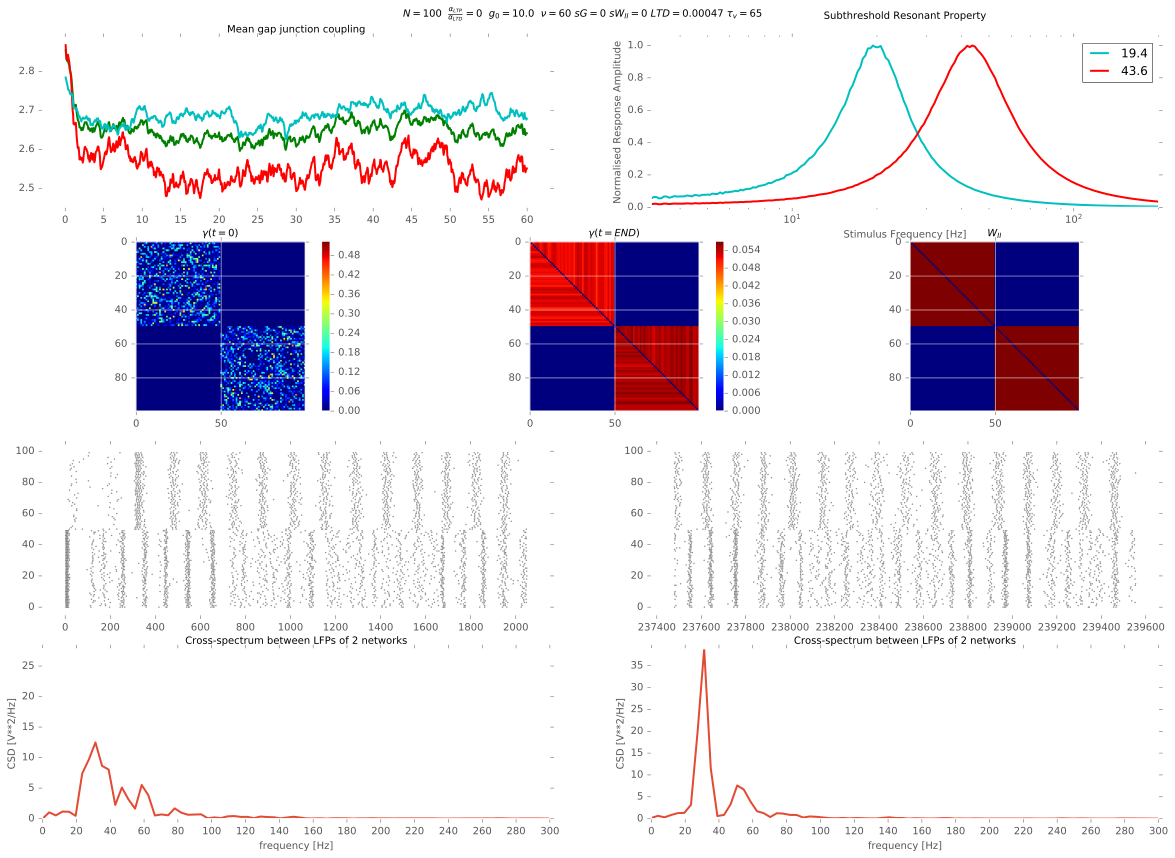

In [5]:
c = cortex
c.with_currents = True
c.g = 10
c.d1 = 10
c.d2 = 60000
c.d3 = 10
c.T = 60020
c.tauv = 65
c.sG=0
c.sWII=0
# c.runSimulation(tauv=c.tauv)
gr.plotWeights(tauv=c.tauv)

./cortex -N 100 -ext _0.txt -d1 10 -d2 1000 -d3 10 -before 10 -after 60010 -S 100 -G 10 -s 60 -WII 1400 -LTP 0.00705 -LTD 0.00047 -model gp-izh-subnetworks -r 0 -global 0 -sG 10 -sWII 0 -tauv 65


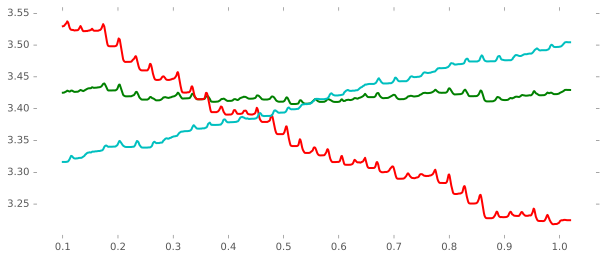

In [29]:
c = cortex
c.with_currents = True
c.g = 10
c.d1 = 10
c.d2 = 1000
c.d3 = 10
c.T = 1020
c.tauv = 65
c.sG=10
c.sWII=0
c.runSimulation(tauv=c.tauv)
# gr.plotWeights(tauv=c.tauv)
plt.plot(xax(c.gamma, c.T), c.gamma, color='g')
plt.plot(xax(c.gammaN1, c.T), c.gammaN1*(1+4*c.sG/c.N), color='r')
plt.plot(xax(c.gammaN2, c.T), c.gammaN2*(1+4*c.sG/c.N), color='c')

# for c.sG in sGList:
#     c.runSimulation(tauv=c.tauv)
#     c.readSimulation()
#     fig = plt.figure(figsize=(8,4))
#     ax0 = fig.add_subplot(111)
#     ax0.plot(xax(c.gamma, c.T), c.gamma, color='g')
#     ax0.plot(xax(c.gammaN1, c.T), c.gammaN1, color='r')
#     ax0.plot(xax(c.gammaN2, c.T), c.gammaN2, color='c')
#     plt.savefig(DIRECTORY+'gammaevol-sg%s.pdf'%str(c.sG))

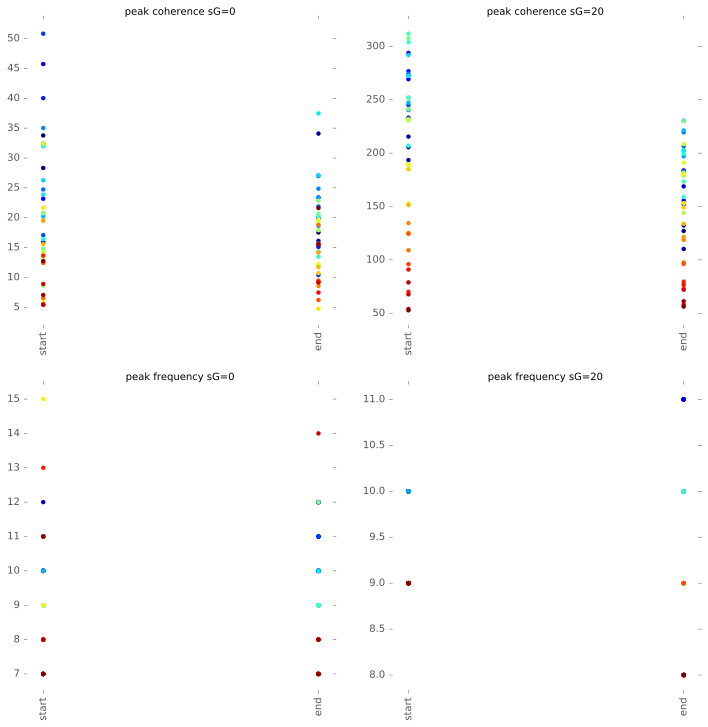

In [8]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
gr.plotCoherence(df,sG=0, ax=ax1)
gr.plotCoherence(df,sG=20, ax=ax2)
gr.plotArgCoherence(df,sG=0, ax=ax3)
gr.plotArgCoherence(df,sG=20, ax=ax4)
plt.savefig(DIRECTORY + 'cor.png')

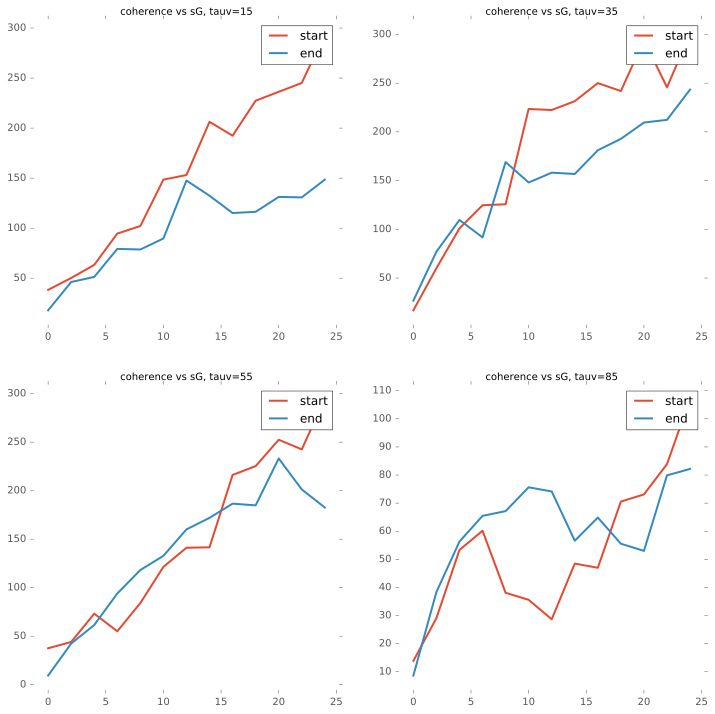

In [14]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
gr.plotSGCoherence(df,tauv=15, ax=ax1)
gr.plotSGCoherence(df,tauv=35, ax=ax2)
gr.plotSGCoherence(df,tauv=55, ax=ax3)
gr.plotSGCoherence(df,tauv=85, ax=ax4)
plt.savefig(DIRECTORY + 'corSG.png')

In [15]:
# c.tauv = 85
# c.sG = 5
# c.sWII = 10
# c.readSimulation()
# gr.plotWeights(c.tauv)

In [16]:
print(gr.fourier(c.i1[0:4000]))
print(gr.fourier(c.i2[0:4000]))
print(gr.fourier(c.i1[-4000:-1]))
print(gr.fourier(c.i2[-4000:-1]))

[41.95804195804196, 22.818809769526279]
[37.962037962037961, 24.74274544602347]
[47.952047952047955, 22.322655962404848]
[39.960039960039957, 24.070237376098586]


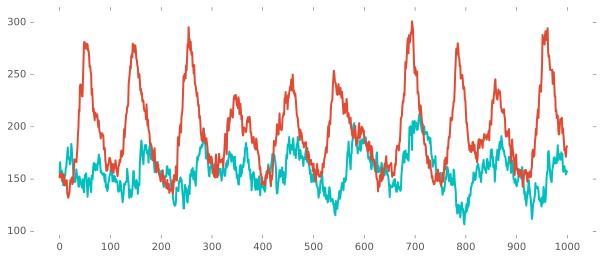

In [41]:
plt.plot(c.i2[500:1500], color='c')
plt.plot(c.i1[500:1500])
plt.savefig(DIRECTORY+'i_start-sg10.pdf')

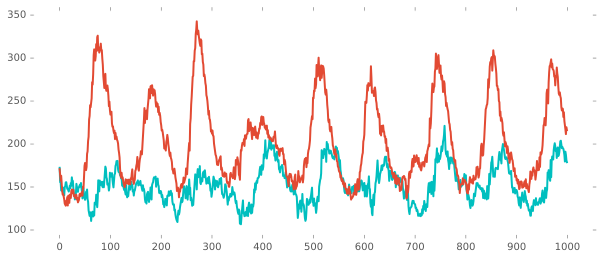

In [42]:
plt.plot(c.i2[-3000:-2000], color='c')
plt.plot(c.i1[-3000:-2000])
plt.savefig(DIRECTORY+'i_end-sg10.pdf')

In [9]:
df.head()

,tauv,d2,sWII,sG,LTD,maxBegin,argmaxBegin,maxEnd,argmaxEnd,f1Begin,...,p2Begin,f1End,p1End,f2End,p2End,fBothStart,pBothStart,fBothEnd,pBothEnd,key
0,15,60000,0,0,True,15.878140,9,13.064454,12,46.976512,...,23.536127,41.979010,23.887559,42.978511,19.882100,46.976512,24.835058,40.979510,25.532795,-2
1,15,60000,0,2,True,42.003056,12,51.684007,11,40.979510,...,21.748936,48.975512,22.502476,44.977511,21.602957,41.979010,28.343166,48.975512,27.664053,-2
2,15,60000,0,4,True,44.567633,12,60.831833,11,46.976512,...,18.387602,44.977511,22.563564,44.977511,23.745664,46.976512,28.176433,44.977511,29.194376,-2
3,15,60000,0,6,True,130.547732,11,83.104317,11,43.978011,...,26.432291,42.978511,25.273791,42.978511,24.505065,43.978011,31.575610,42.978511,30.910469,-2
4,15,60000,0,8,True,137.213774,11,131.491094,11,40.979510,...,26.322433,43.978011,22.062441,43.978011,23.152571,40.979510,32.714260,43.978011,28.558164,-2


(40, 13)
(40, 13)
(40, 13)
(40, 13)


0

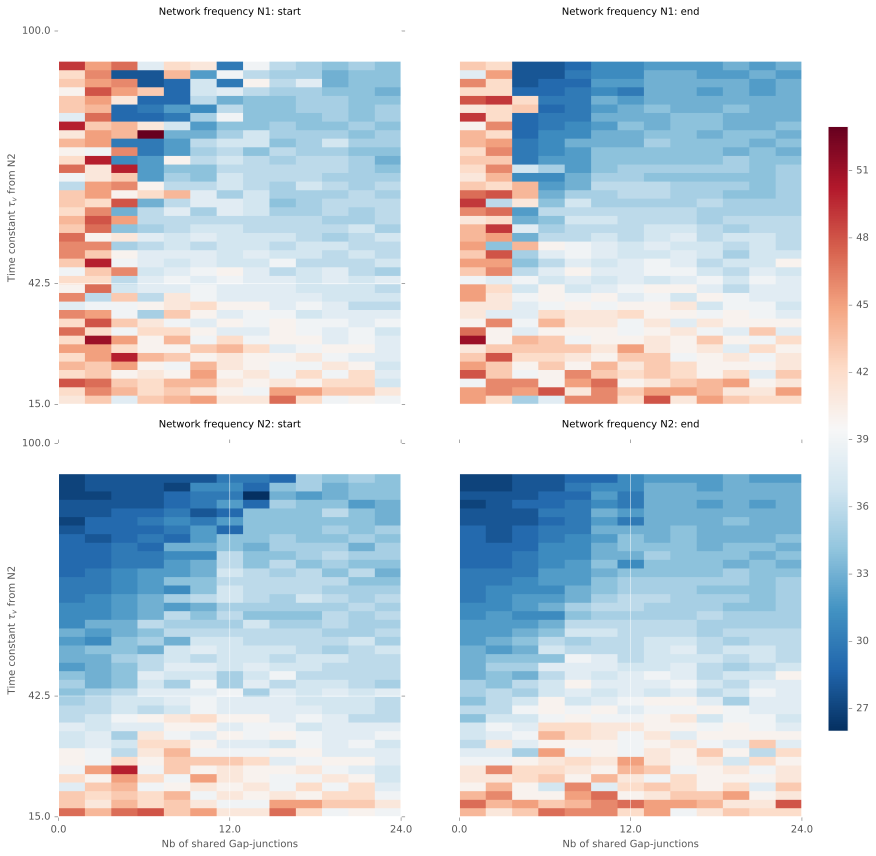

In [43]:
gr.plotEvolution(df, kind = 'frequency')

(40, 13)
(40, 13)
(40, 13)
(40, 13)


0

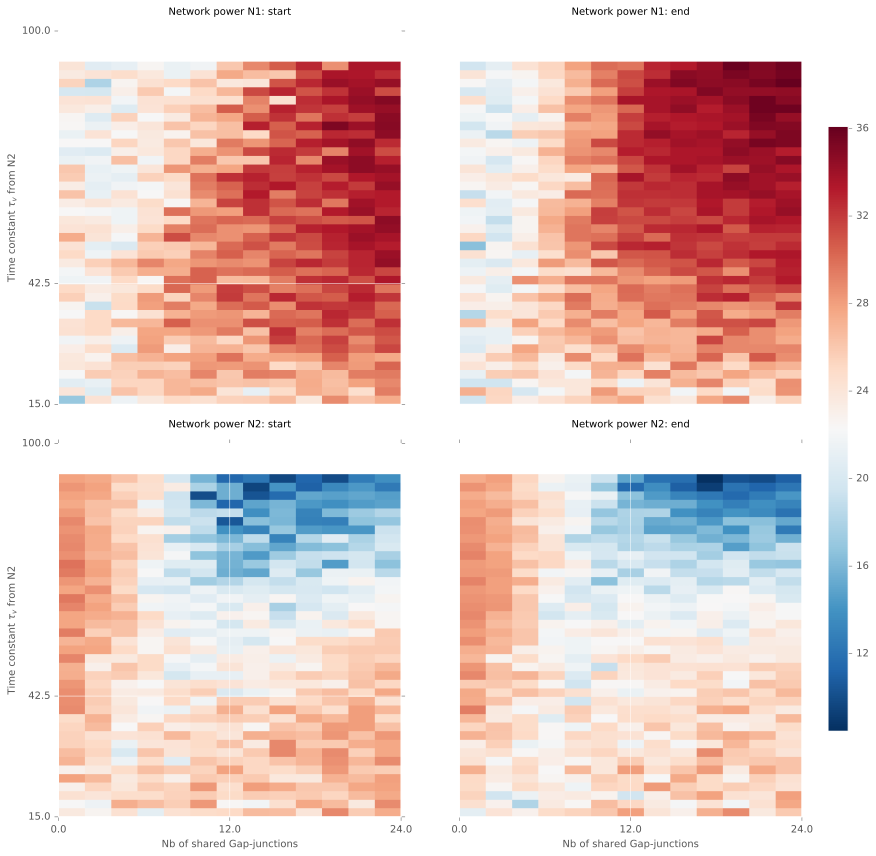

In [22]:
gr.plotEvolution(df, kind='power')

(40, 13)
(40, 13)


0

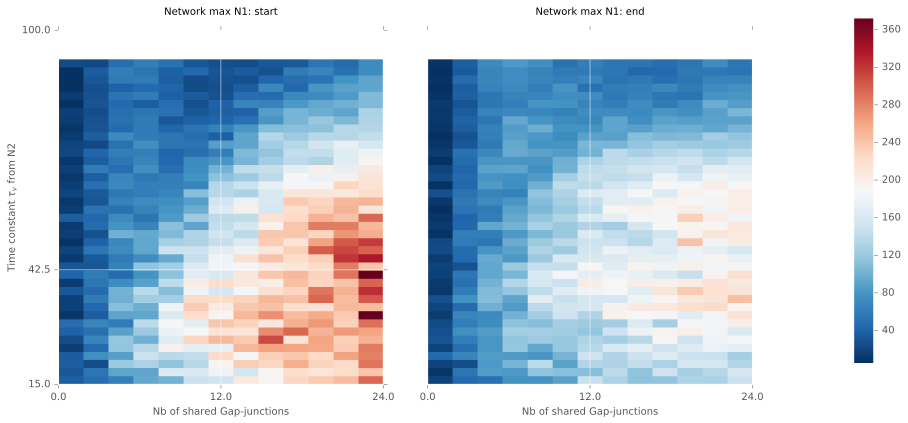

In [45]:
gr.plotCoherenceEvolution(df, kind='max')

(40, 13)
(40, 13)


0

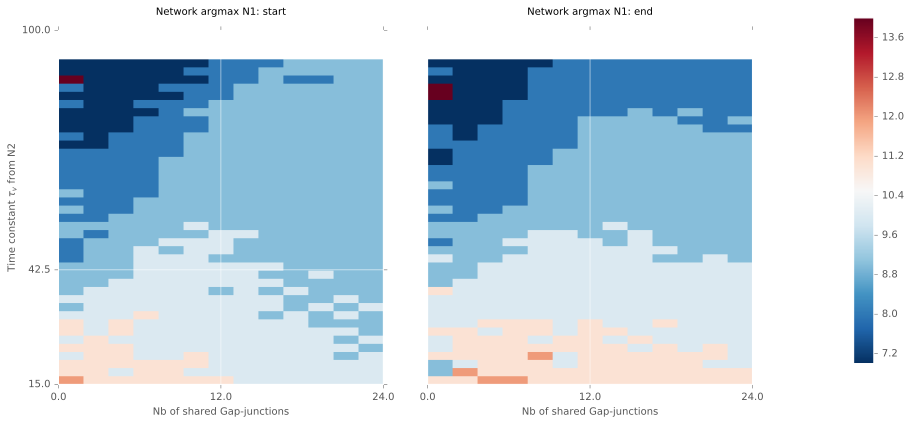

In [47]:
gr.plotCoherenceEvolution(df, kind='argmax')

(40, 13)
(40, 13)
(40, 13)
(40, 13)


0

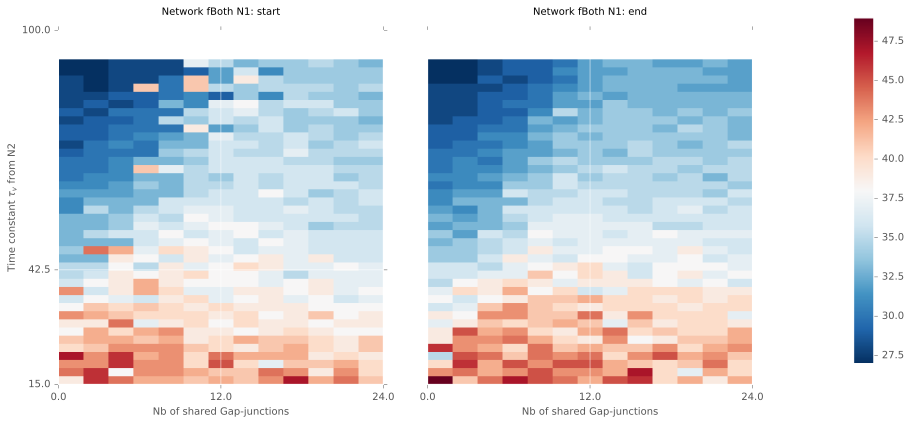

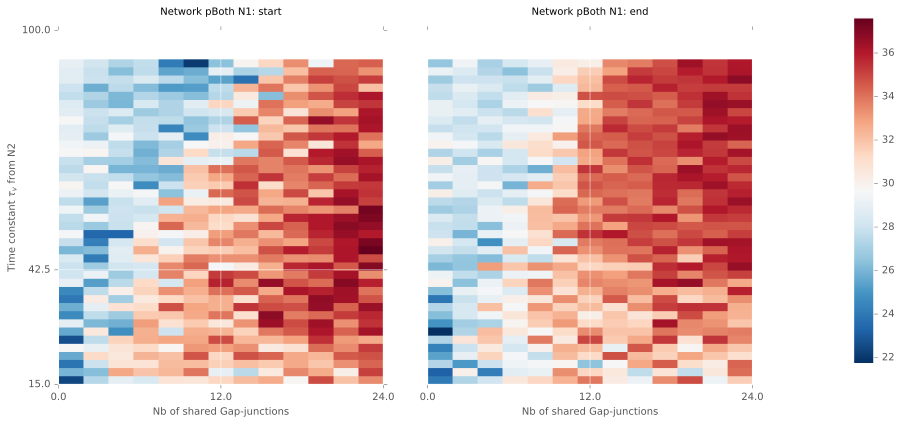

In [19]:
gr.plotCoherenceEvolution(df, kind='fBoth')
gr.plotCoherenceEvolution(df, kind='pBoth')

In [23]:
# def plotChange(dataframe, kind='max',network = '', both=None, vmin=None, vmax=None, sWII=10, title=""):
#     fig = plt.figure(figsize=(8,6))

    
#     df = dataframe
#     df = df[(df['LTD']==True)& (df['sWII']==sWII)]
#     extent = [np.min(df['sG']), np.max(df['sG']), np.min(df['tauv']), np.max(df['tauv'])]

#     ax1 = fig.add_subplot(111)

#     cmap = plt.cm.RdYlGn

#     title = r'%s'%(title)
#     column = kind + 'Begin'
#     filename = column + '.pdf'
#     ax1, im = gr.plotDiagramChangeCSD(fig, ax1, df, title, 
#                                       kind, filename, extent=extent, cmap = cmap, both=both,
#                                      vmin=vmin, vmax=vmax)

#     fig.subplots_adjust(right=0.95)
#     cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
#     cbar = fig.colorbar(im, cax=cbar_ax)

#     plt.savefig(DIRECTORY + kind + 'change_cluster.pdf')
    
# def plotChange2(dataframe, kind='max',network = '', title='', both=None, vmin=None, vmax=None, sWII=10):
#     fig = plt.figure(figsize=(8,12))
    
#     df = dataframe
#     df = df[(df['LTD']==True)& (df['sWII']==sWII)]
#     extent = [np.min(df['sG']), np.max(df['sG']), np.min(df['tauv']), np.max(df['tauv'])]

#     ax1 = fig.add_subplot(211)
#     ax2 = fig.add_subplot(212)
#     cmap = plt.cm.RdYlGn

#     title = r'%s'%(title)
#     column = kind + 'Begin'
#     filename = "".join(title.split(' ') )+ '.pdf'
#     ax1, im = gr.plotDiagramChangeCSD(fig, ax1, df, title, kind, filename, extent=extent, cmap = cmap,
#                                      both=both,
#                                      vmin=vmin, vmax=vmax)
    
#     title = r'%s'%(title)
#     column = kind[:-1] + '2Begin'
#     filename = "".join(title.split(' ') )+ '2.pdf'
#     ax2, im = gr.plotDiagramChangeCSD(fig, ax2, df, title, kind[:-1] + '2', filename, extent=extent, cmap = cmap,
#                                      both=both,
#                                      vmin=vmin, vmax=vmax)
    
#     ax2.set_title('')
#     ax1.set_xticks([])
#     ax1.set_xlabel("")
#     fig.subplots_adjust(right=0.95)
#     cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
#     cbar = fig.colorbar(im, cax=cbar_ax)
#     plt.tight_layout()
#     plt.savefig(DIRECTORY + kind + 'both_change_cluster.pdf')

/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


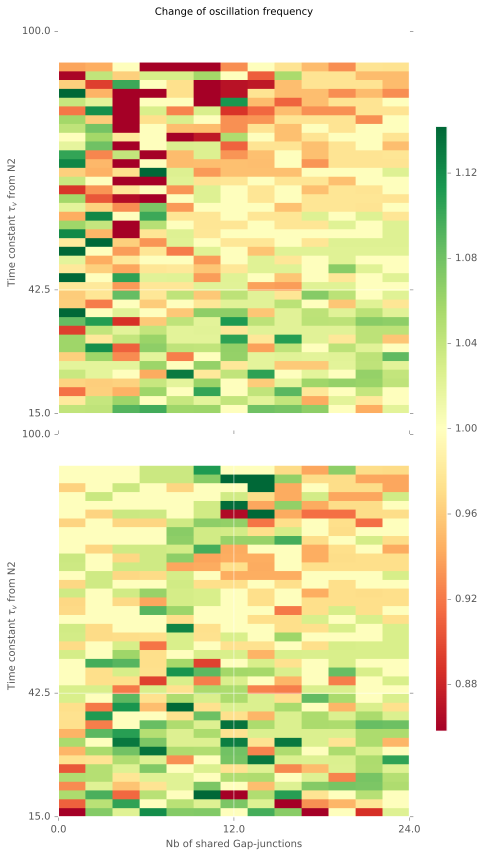

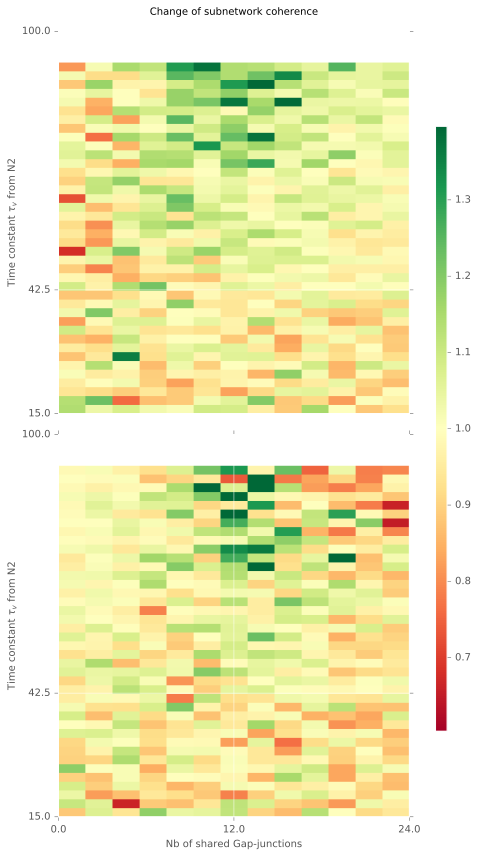

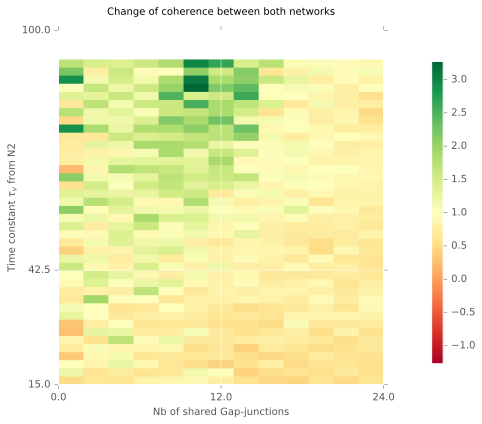

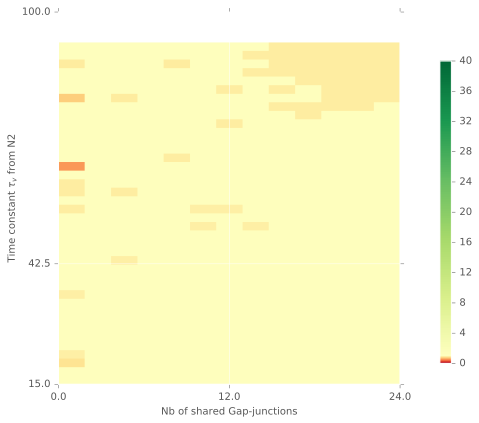

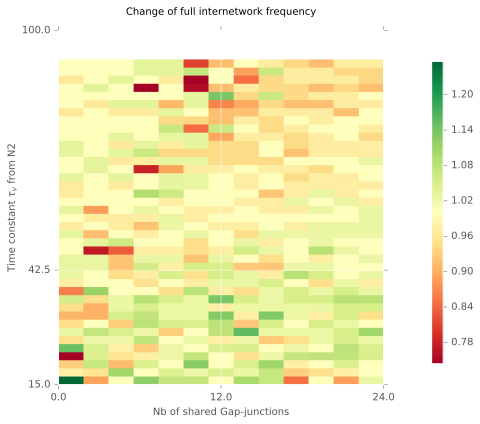

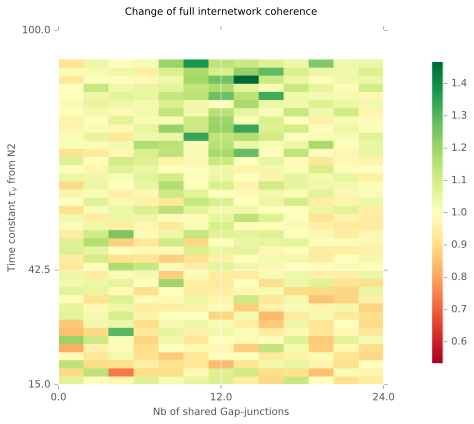

In [18]:
gr.plotChange2(df, 'f1', 'N1', both=True, title='Change of oscillation frequency', sWII=10)
gr.plotChange2(df, 'p1', 'N1', both=True, title='Change of subnetwork coherence', sWII=10)
# plotChange('f1', 'N1')
# plotChange('f1', 'N1', both=True)
# plotChange('f2', 'N2', both=True)
# plotChange('p1', 'N1', both=True)
# plotChange('p2', 'N2', both=True)
gr.plotChange(df, 'max', title="Change of coherence between both networks")
gr.plotChange(df, 'argmax', vmin=0, vmax=40)
gr.plotChange(df, 'fBoth', title="Change of full internetwork frequency")
gr.plotChange(df, 'pBoth', title="Change of full internetwork coherence")

